In [1]:
# import csv
# import cv2
import numpy as np
# import pandas as pd
# import os
# import sys
import tensorflow as tf
from matplotlib import pyplot as plt


In [2]:
from pose_estimation import utils
from pose_estimation.data import BodyPart
from pose_estimation.ml import Movenet
movenet = Movenet('movenet_thunder')

# Gọi hàm nhận dạng của movenet nhiều lần để cải thiện độ chính xác nhận dạng khung xương


def detect(input_tensor, inference_count=3):
  """Runs detection on an input image.
 
  Args:
    input_tensor: A [height, width, 3] Tensor of type tf.float32.
    inference_count: Số lần lặp.
 
  Returns:
    A Person entity detected by the MoveNet.SinglePose.
  """
  image_height, image_width, channel = input_tensor.shape

  # Detect pose using the full input image
  movenet.detect(input_tensor.numpy(), reset_crop_region=True)

  # Repeatedly using previous detection result to identify the region of
  # interest and only croping that region to improve detection accuracy
  for _ in range(inference_count - 1):
    person = movenet.detect(input_tensor.numpy(),
                            reset_crop_region=False)

  return person


In [9]:
def draw_prediction_on_image(
        image, person, crop_region=None, close_figure=True,
        keep_input_size=False):
  """Draws the keypoint predictions on image.
 
  Args:
    image: An numpy array with shape [height, width, channel] representing the
      pixel values of the input image.
    person: A person entity returned from the MoveNet.SinglePose model.
    close_figure: Whether to close the plt figure after the function returns.
    keep_input_size: Whether to keep the size of the input image.
 
  Returns:
    An numpy array with shape [out_height, out_width, channel] representing the
    image overlaid with keypoint predictions.
  """
  # Draw the detection result on top of the image.
  image_np = utils.visualize(image, [person])

  # Plot the image with detection results.
  height, width, channel = image.shape
  aspect_ratio = float(width) / height
  fig, ax = plt.subplots(figsize=(12 * aspect_ratio, 12))
  ax.imshow(image_np)

  if close_figure:
    plt.close(fig)

  if not keep_input_size:
    image_np = utils.keep_aspect_ratio_resizer(image_np, (512, 512))

  return image_np


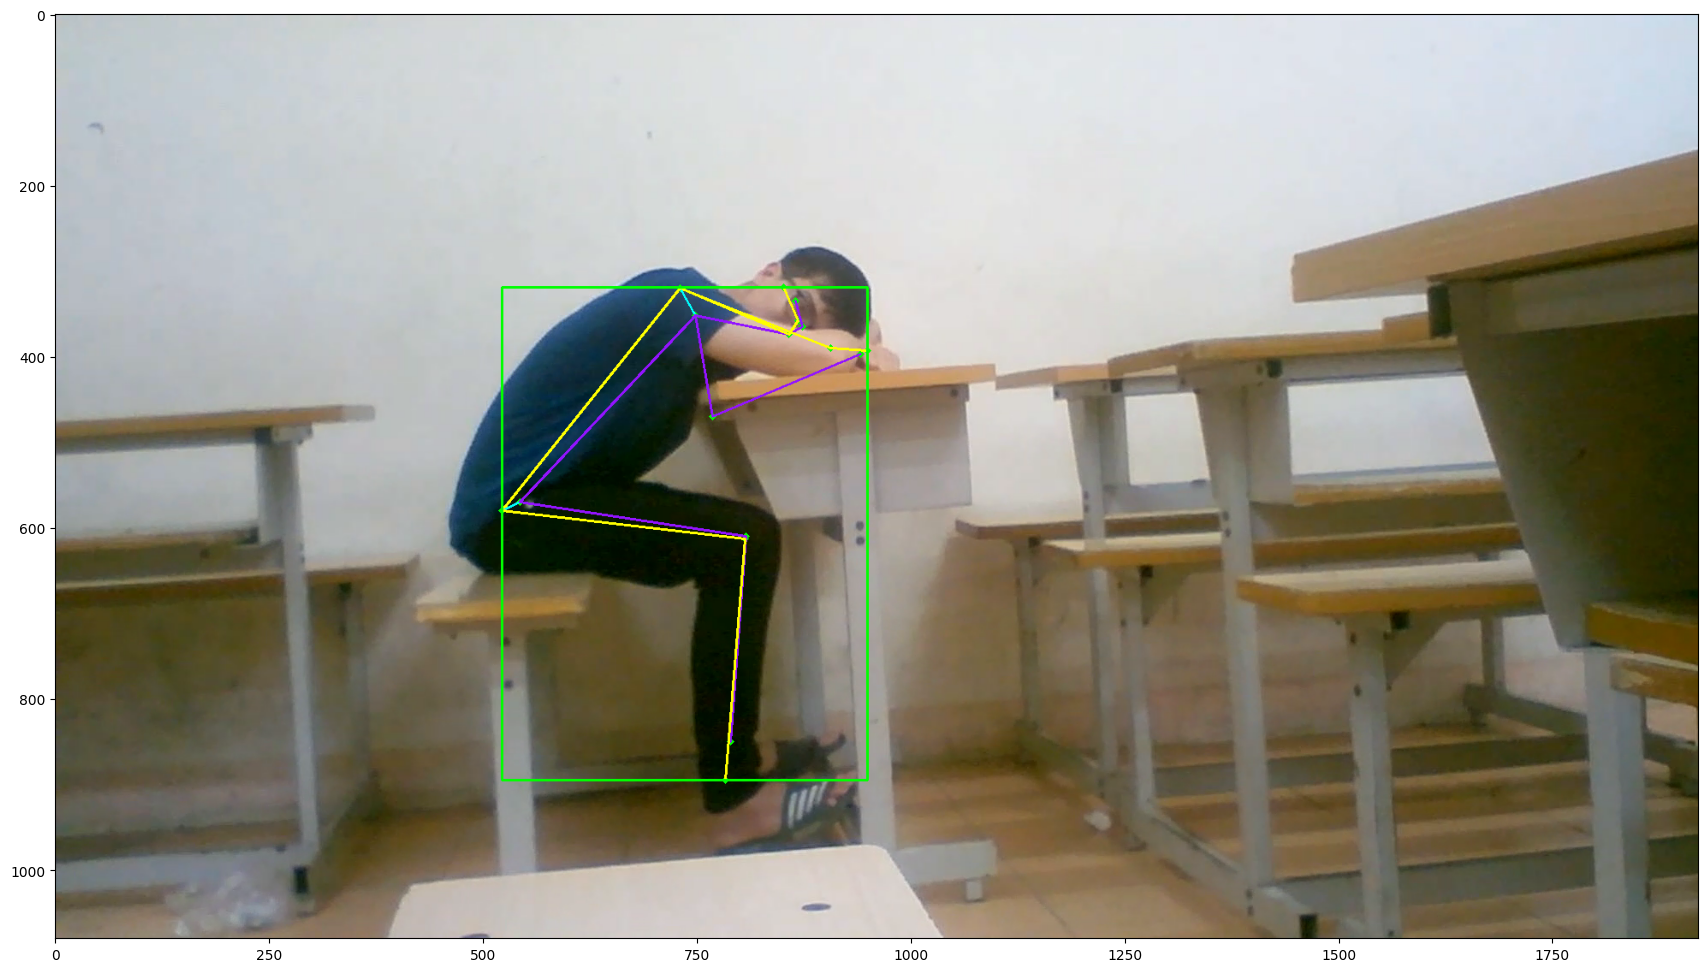

In [17]:
imgPath = "C:/Users/DELL/Downloads/04_0093.png"
image = tf.io.read_file(imgPath)
img = tf.io.decode_jpeg(image)
pers = detect(img)

img = draw_prediction_on_image(img.numpy().astype(np.uint8), pers,
                         close_figure=False, keep_input_size=True)

plt.show()

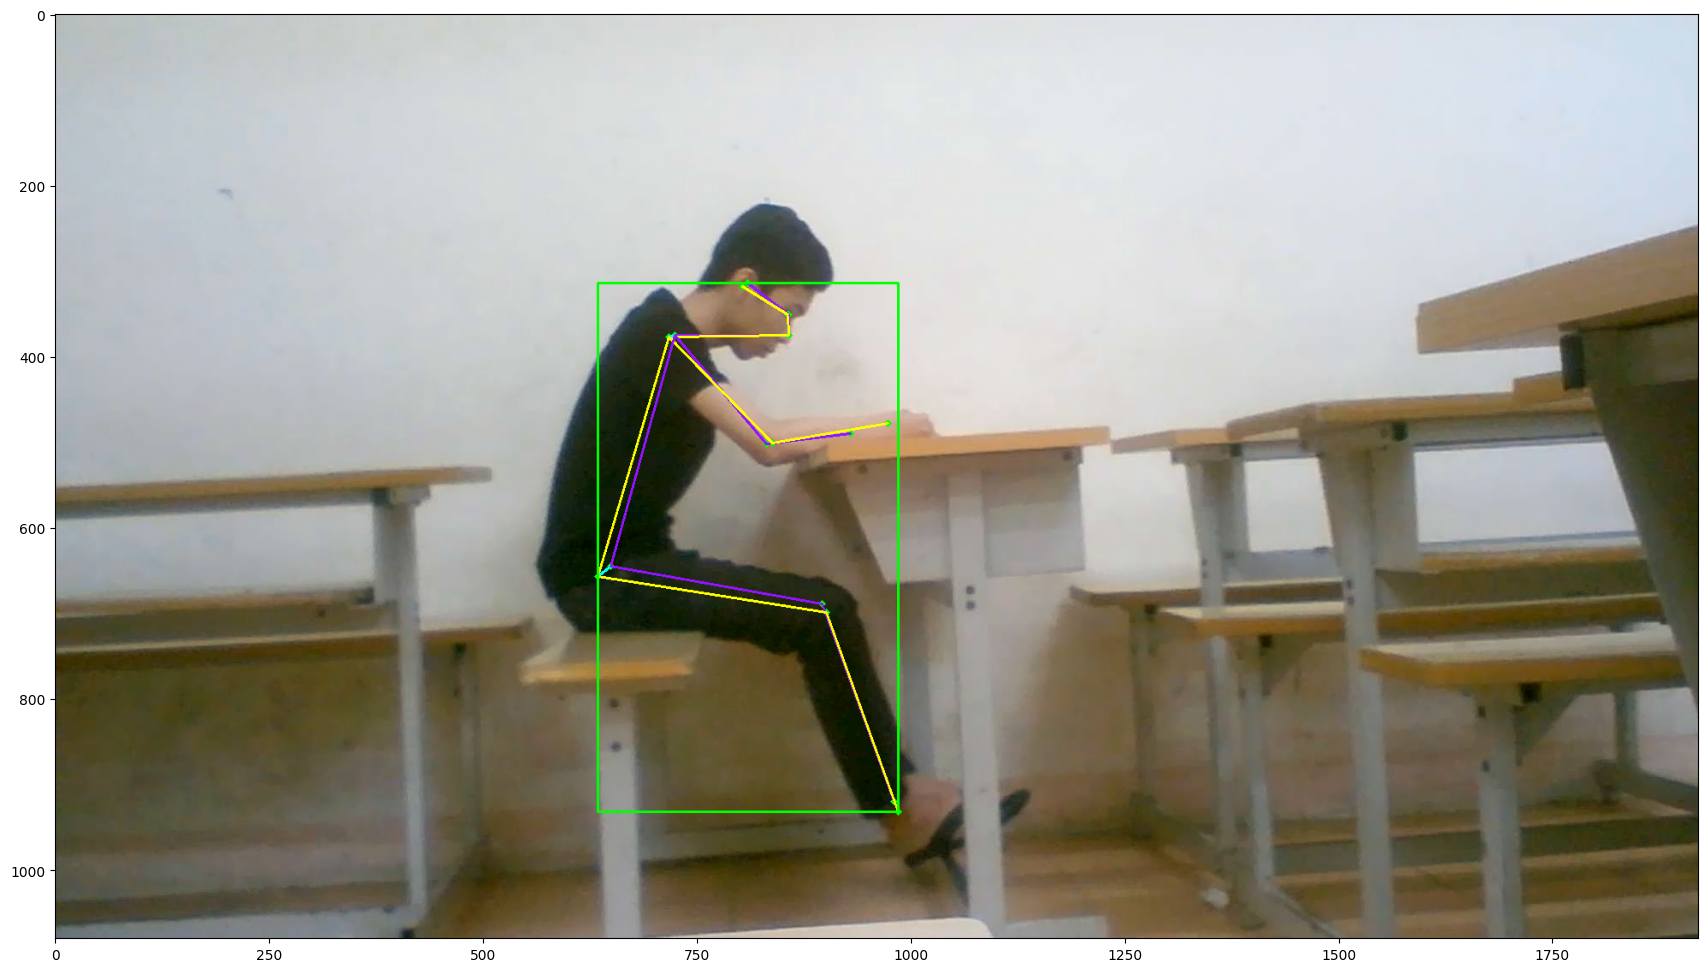

In [18]:
imgPath = "C:/Users/DELL/Downloads/02_0113.png"
image = tf.io.read_file(imgPath)
img = tf.io.decode_jpeg(image)
pers = detect(img)

img = draw_prediction_on_image(img.numpy().astype(np.uint8), pers,
                               close_figure=False, keep_input_size=True)

plt.show()


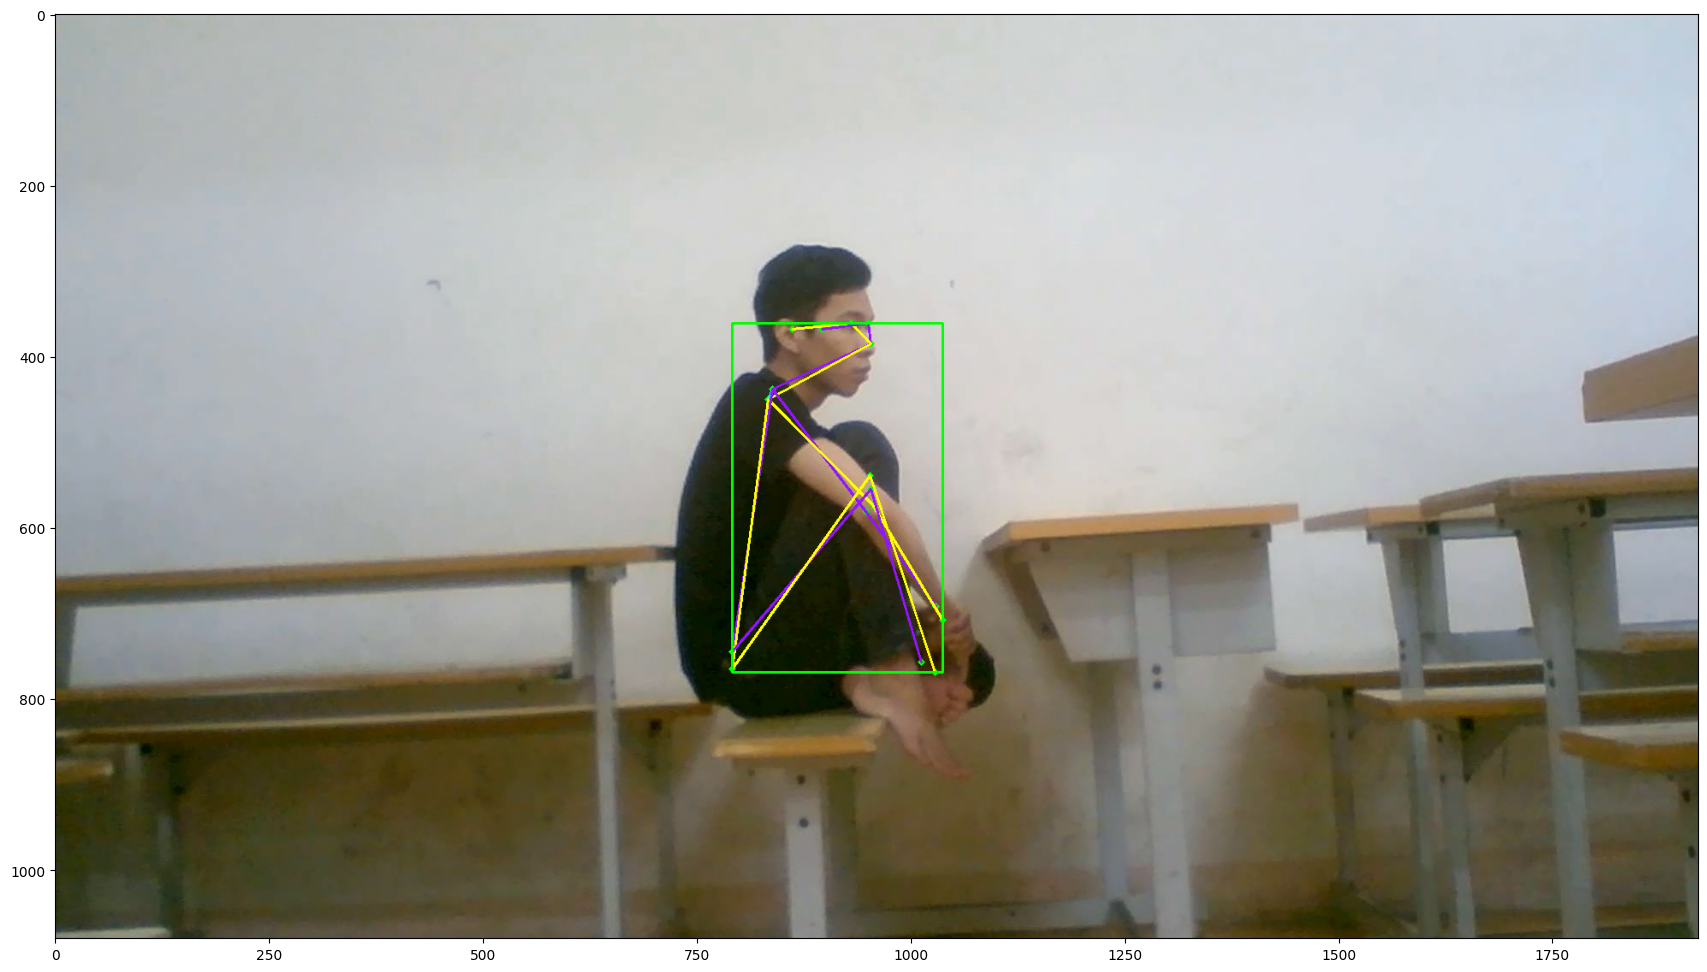

[KeyPoint(body_part=<BodyPart.NOSE: 0>, coordinate=Point(x=953, y=385), score=0.71493816),
 KeyPoint(body_part=<BodyPart.LEFT_EYE: 1>, coordinate=Point(x=950, y=361), score=0.85727996),
 KeyPoint(body_part=<BodyPart.RIGHT_EYE: 2>, coordinate=Point(x=930, y=361), score=0.8544662),
 KeyPoint(body_part=<BodyPart.LEFT_EAR: 3>, coordinate=Point(x=896, y=368), score=0.5173873),
 KeyPoint(body_part=<BodyPart.RIGHT_EAR: 4>, coordinate=Point(x=861, y=368), score=0.7292212),
 KeyPoint(body_part=<BodyPart.LEFT_SHOULDER: 5>, coordinate=Point(x=838, y=438), score=0.59967864),
 KeyPoint(body_part=<BodyPart.RIGHT_SHOULDER: 6>, coordinate=Point(x=833, y=450), score=0.76356184),
 KeyPoint(body_part=<BodyPart.LEFT_ELBOW: 7>, coordinate=Point(x=947, y=581), score=0.39835665),
 KeyPoint(body_part=<BodyPart.RIGHT_ELBOW: 8>, coordinate=Point(x=955, y=573), score=0.7606777),
 KeyPoint(body_part=<BodyPart.LEFT_WRIST: 9>, coordinate=Point(x=1029, y=692), score=0.3768301),
 KeyPoint(body_part=<BodyPart.RIGHT_WR

In [16]:
imgPath = "C:/Users/DELL/Downloads/08_0175.png"
image = tf.io.read_file(imgPath)
img = tf.io.decode_jpeg(image)
pers = detect(img)

img = draw_prediction_on_image(img.numpy().astype(np.uint8), pers,
                               close_figure=False, keep_input_size=True)

plt.show()
pers.keypoints